In [151]:
import pandas as pd
import numpy as np

파일을 불러와 문장으로 분리하는 함수  
3칸이상 차이하는것만 <<>>

In [201]:
def seperate_alphabet(dataDF,folder,lan,start_n,num):
    sentences=[]
    for i in range(start_n,start_n+num):
        f=open(f'{folder}/{lan}-{i}.txt','r')
        article=f.read().lower()
        sentence=article.split('\n')
        for st in range(len(sentence)):
                if len(sentence[st])>20:
                    sentences=sentences+[sentence[st]]
    for idx in range(len(sentences)):
        #dataDF[f'{lan}{idx}']=pd.Series(list(sentences[idx])).value_counts()
        dataDF=pd.concat([dataDF,pd.DataFrame({f'{lan}{idx}':pd.Series(list(sentences[idx])).value_counts()})],axis=1)
        dataDF.loc['target',f'{lan}{idx}']=lan
        f.close()
    return dataDF

In [153]:
dataDF=pd.DataFrame()


In [154]:
dataDF=seperate_alphabet(dataDF,'train','en',1,5)
dataDF=seperate_alphabet(dataDF,'train','fr',6,5)
dataDF=seperate_alphabet(dataDF,'train','id',11,5)
dataDF=seperate_alphabet(dataDF,'train','tl',16,5)

In [155]:
featureDF=dataDF.T

In [156]:
target=featureDF['target']
featureDF=featureDF.drop(columns='target')

In [157]:
featureDF.head()

,,e,o,s,m,r,h,u,a,n,...,ر,ج,ή,η,τ,λ,γ,ˈ,×,±
en0,15.0,9.0,8.0,7.0,6.0,6.0,6.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en1,80.0,38.0,38.0,20.0,13.0,25.0,18.0,14.0,31.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en2,75.0,48.0,26.0,34.0,11.0,20.0,17.0,15.0,32.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en3,32.0,15.0,14.0,9.0,3.0,13.0,13.0,5.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en4,35.0,23.0,13.0,11.0,2.0,10.0,5.0,10.0,25.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
featureDF

,,e,o,s,m,r,h,u,a,n,...,ر,ج,ή,η,τ,λ,γ,ˈ,×,±
en0,15.0,9.0,8.0,7.0,6.0,6.0,6.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en1,80.0,38.0,38.0,20.0,13.0,25.0,18.0,14.0,31.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en2,75.0,48.0,26.0,34.0,11.0,20.0,17.0,15.0,32.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en3,32.0,15.0,14.0,9.0,3.0,13.0,13.0,5.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en4,35.0,23.0,13.0,11.0,2.0,10.0,5.0,10.0,25.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tl584,12.0,3.0,2.0,NaN,NaN,1.0,NaN,3.0,12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tl585,13.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,16.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tl586,8.0,2.0,1.0,1.0,NaN,1.0,NaN,2.0,7.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tl587,14.0,5.0,14.0,1.0,6.0,8.0,NaN,2.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [159]:
# 쓸데없는 컬럼삭제 
# NAN 갯수기준
featureDF=featureDF.dropna(axis=1,thresh=100)

In [160]:
featureDF

,,e,o,s,m,r,h,u,a,n,...,:,q,"""",',,é,è,à,|,↑
en0,15.0,9.0,8.0,7.0,6.0,6.0,6.0,4.0,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en1,80.0,38.0,38.0,20.0,13.0,25.0,18.0,14.0,31.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en2,75.0,48.0,26.0,34.0,11.0,20.0,17.0,15.0,32.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en3,32.0,15.0,14.0,9.0,3.0,13.0,13.0,5.0,12.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en4,35.0,23.0,13.0,11.0,2.0,10.0,5.0,10.0,25.0,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tl584,12.0,3.0,2.0,NaN,NaN,1.0,NaN,3.0,12.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
tl585,13.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,16.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
tl586,8.0,2.0,1.0,1.0,NaN,1.0,NaN,2.0,7.0,3.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
tl587,14.0,5.0,14.0,1.0,6.0,8.0,NaN,2.0,4.0,8.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


In [161]:
featureDF.columns

Index([' ', 'e', 'o', 's', 'm', 'r', 'h', 'u', 'a', 'n', 'f', 'd', 't', 'y',
       'i', 'l', 'c', 'b', 'g', 'p', ',', '.', 'v', 'j', '0', '1', 'w', 'k',
       '4', '6', '7', '2', '[', ']', '9', 'x', '/', '^', '(', ')', '-', 'z',
       '5', '3', '8', ':', 'q', '"', ''', ' ', 'é', 'è', 'à', '|', '↑'],
      dtype='object')

In [162]:
featureDF.columns

Index([' ', 'e', 'o', 's', 'm', 'r', 'h', 'u', 'a', 'n', 'f', 'd', 't', 'y',
       'i', 'l', 'c', 'b', 'g', 'p', ',', '.', 'v', 'j', '0', '1', 'w', 'k',
       '4', '6', '7', '2', '[', ']', '9', 'x', '/', '^', '(', ')', '-', 'z',
       '5', '3', '8', ':', 'q', '"', ''', ' ', 'é', 'è', 'à', '|', '↑'],
      dtype='object')

In [163]:
featureDF=featureDF.fillna('0')

testset 전처리

In [164]:
testDF=pd.DataFrame(index=featureDF.columns)
testDF=seperate_alphabet(testDF,'test','en',1,2)
testDF=seperate_alphabet(testDF,'test','fr',3,2)
testDF=seperate_alphabet(testDF,'test','id',5,2)
testDF=seperate_alphabet(testDF,'test','tl',7,2)

In [165]:
testDF=testDF.T
test_target=testDF['target']
testDF=testDF.drop(columns='target')

In [166]:
testDF

,,e,o,s,m,r,h,u,a,n,...,τ,ί,α,κ,°,ə,ɛ,ˌ,ɒ,ɹ
en0,16.0,11.0,8.0,8.0,1.0,7.0,3.0,3.0,4.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en1,12.0,8.0,5.0,6.0,1.0,5.0,3.0,2.0,6.0,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en2,3.0,3.0,2.0,3.0,NaN,2.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en3,7.0,3.0,3.0,3.0,1.0,2.0,NaN,NaN,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
en4,7.0,NaN,1.0,2.0,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tl206,3.0,NaN,NaN,NaN,1.0,2.0,NaN,2.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tl207,203.0,58.0,67.0,55.0,44.0,47.0,11.0,33.0,196.0,119.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tl208,5.0,NaN,NaN,1.0,1.0,NaN,2.0,3.0,9.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tl209,11.0,7.0,7.0,5.0,1.0,4.0,2.0,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [167]:
# testDF=testDF.dropna(axis=1,thresh=1000)
# testDF

In [168]:
testDF.columns

Index([' ', 'e', 'o', 's', 'm', 'r', 'h', 'u', 'a', 'n',
       ...
       'τ', 'ί', 'α', 'κ', '°', 'ə', 'ɛ', 'ˌ', 'ɒ', 'ɹ'],
      dtype='object', length=121)

In [169]:
testDF=testDF.fillna(0)

In [170]:

for i in testDF.columns:
    if i not in featureDF.columns:
        testDF=testDF.drop(columns=i)

In [171]:
featureDF.columns==testDF.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

featureSet scaler - minmax..?

In [172]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler=MinMaxScaler()
scaler.fit(featureDF)
featureDF_scaler=scaler.transform(featureDF)
testDF_scaler=scaler.transform(testDF)

# featureDF_scaler=np.log1p(featureDF)
# testDF_scaler=np.log1p(testDF)

## 모델학습

DecisionTreeClassfier

In [173]:
from sklearn.tree import DecisionTreeClassifier

In [174]:
dt_model=DecisionTreeClassifier(random_state=10,max_depth=30,min_samples_leaf=10)
dt_model.fit(featureDF_scaler,target)

DecisionTreeClassifier(max_depth=30, min_samples_leaf=10, random_state=10)

In [175]:
dt_model.score(featureDF_scaler,target)

0.8349696119682094

In [176]:
dt_model.score(testDF_scaler,test_target)

0.5361163227016885

In [177]:
from sklearn.tree import export_graphviz

export_graphviz(dt_model,out_file='tree.dot',
                feature_names=featureDF.columns,impurity=True,filled=True,
                rounded=True, # 동글동글
                )

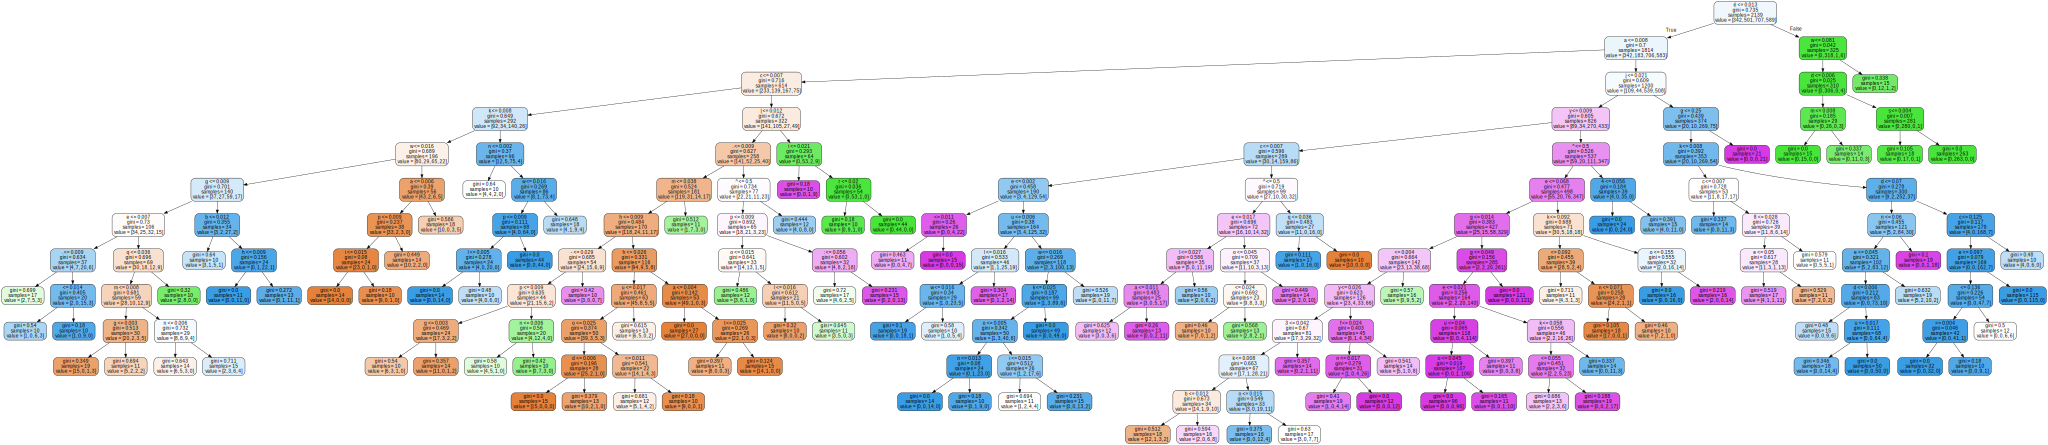

In [178]:
##(2) dot 파일 출력
import graphviz

# 파일데이터 읽어오기
with open('tree.dot') as f:
    dot_data=f.read()

# 화면에 출력하기
graphviz.Source(dot_data)

In [179]:
dt_model.get_depth()

12

In [180]:
dt_model.get_n_leaves()

105

OVR

In [181]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

ovr_clf=OneVsRestClassifier(LogisticRegression(max_iter=1000))
ovr_clf.fit(featureDF_scaler,target)

OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000))

In [182]:
ovr_clf.score(featureDF_scaler,target)

0.7349228611500701

In [183]:
ovr_clf.score(testDF_scaler,test_target)

0.4437148217636023

Voting

In [184]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [185]:
# 알고리즘 인스턴스 생성
k_model=KNeighborsClassifier()

# 보팅인스턴스 생성
vh_model=VotingClassifier(estimators=[('k_model',k_model),('dt_model',dt_model),('ovr_clf',ovr_clf)],voting='hard')

# 소프트 보팅인스턴스 생성
vs_model=VotingClassifier(estimators=[('k_model',k_model),('dt_model',dt_model),('ovr_clf',ovr_clf)],voting='soft')


In [186]:
# 학습 진행
vh_model.fit(featureDF_scaler,target) 
vs_model.fit(featureDF_scaler,target) 

VotingClassifier(estimators=[('k_model', KNeighborsClassifier()),
                             ('dt_model',
                              DecisionTreeClassifier(max_depth=30,
                                                     min_samples_leaf=10,
                                                     random_state=10)),
                             ('ovr_clf',
                              OneVsRestClassifier(estimator=LogisticRegression(max_iter=1000)))],
                 voting='soft')

In [187]:
hard_train_score=vh_model.score(featureDF_scaler,target)
hard_test_score=vh_model.score(testDF_scaler,test_target)

soft_train_score=vs_model.score(featureDF_scaler,target)
soft_test_score=vs_model.score(testDF_scaler,test_target)

In [188]:
print(F'hard_train_score : hard_test_score = {hard_train_score} : {hard_test_score}')

print(F'soft_train_score : soft_test_score = {soft_train_score} : {soft_test_score}')

hard_train_score : hard_test_score = 0.8817204301075269 : 0.5609756097560976
soft_train_score : soft_test_score = 0.9251986909770921 : 0.5675422138836773


RandomForest

In [189]:
from sklearn.ensemble import RandomForestClassifier

In [190]:
rf_model=RandomForestClassifier(random_state=5)

# 학습진행
rf_model.fit(featureDF_scaler,target)

RandomForestClassifier(random_state=5)

In [191]:
rf_model.score(featureDF_scaler,target)

1.0

In [192]:
rf_model.score(testDF_scaler,test_target)

0.6430581613508443

## 튜닝

In [193]:
from sklearn.model_selection import RandomizedSearchCV

In [194]:
params={'max_depth':range(20,40),'min_samples_leaf':range(1,10)}

In [195]:
searchCV=RandomizedSearchCV(rf_model,
                            param_distributions=params,
                            verbose=4)

In [196]:
searchCV.fit(featureDF_scaler,target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..max_depth=20, min_samples_leaf=3;, score=0.871 total time=   0.3s
[CV 2/5] END ..max_depth=20, min_samples_leaf=3;, score=0.794 total time=   0.3s
[CV 3/5] END ..max_depth=20, min_samples_leaf=3;, score=0.813 total time=   0.3s
[CV 4/5] END ..max_depth=20, min_samples_leaf=3;, score=0.813 total time=   0.3s
[CV 5/5] END ..max_depth=20, min_samples_leaf=3;, score=0.710 total time=   0.3s
[CV 1/5] END ..max_depth=24, min_samples_leaf=5;, score=0.864 total time=   0.2s
[CV 2/5] END ..max_depth=24, min_samples_leaf=5;, score=0.780 total time=   0.2s
[CV 3/5] END ..max_depth=24, min_samples_leaf=5;, score=0.808 total time=   0.2s
[CV 4/5] END ..max_depth=24, min_samples_leaf=5;, score=0.785 total time=   0.2s
[CV 5/5] END ..max_depth=24, min_samples_leaf=5;, score=0.712 total time=   0.2s
[CV 1/5] END ..max_depth=38, min_samples_leaf=8;, score=0.841 total time=   0.2s
[CV 2/5] END ..max_depth=38, min_samples_leaf=8;

RandomizedSearchCV(estimator=RandomForestClassifier(random_state=5),
                   param_distributions={'max_depth': range(20, 40),
                                        'min_samples_leaf': range(1, 10)},
                   verbose=4)

In [197]:
searchCV.best_estimator_.max_depth

27

In [198]:
searchCV.best_estimator_.min_samples_leaf

1

In [199]:
searchCV.best_estimator_.score(featureDF_scaler,target)

1.0

In [200]:
searchCV.best_estimator_.score(testDF_scaler,test_target)

0.6435272045028143